In [91]:
#This block is copied over from worksheet "03.12.18 - playing around with python"

import sqlite3
import numpy as np
import pandas as pd
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

import pickle


#Connection to the local database
database = "c:/Users/tommc/Documents/University/CSProject/db/baseball.db"

#sqlite connection function
conn = sqlite3.connect(database)

#c is now what we use to pass commands to the database
c = conn.cursor()
#an example of a command. 
#execute docs: https://docs.python.org/2/library/sqlite3.html#sqlite3.Cursor.execute
#This is pulling out the team name as the overall win percentage for each season
c.execute("SELECT TEAM_ID, TOTAL_WIN_PERCENT_2012, TOTAL_WIN_PERCENT_2013, TOTAL_WIN_PERCENT_2014, TOTAL_WIN_PERCENT_2015, TOTAL_WIN_PERCENT_2016 FROM Team")

#fetchall: https://docs.python.org/2/library/sqlite3.html#sqlite3.Cursor.fetchall
teamData = c.fetchall()

#taking the data from the execute and popping it into an array for svm use.
A1 = np.array(teamData)

#The same as A1 just with the team names chopped off
B1 = np.delete(A1, 0, 1)

#Just the team names
B2 = A1[:,0]

#Convert the strings into floats, ready for some MATH MAGIC
C1 = B1.astype(np.float)

#2012 data 1/5th 
C1[:,0] *= 0.1
#2013 data 2/5th 
C1[:,1] *= 0.3
#2014 data 3/5th 
C1[:,2] *= 0.5
#2015 data 4/5th 
C1[:,3] *= 0.7
#2016 data is unchanged 


#Getting the teams back
D1 = np.column_stack((B2,C1))

print(C1)

[[ 0.05        0.15        0.19753086  0.34135802  0.42592593]
 [ 0.05802469  0.17777778  0.24382716  0.28950617  0.42236025]
 [ 0.05740741  0.15740741  0.2962963   0.35        0.54938272]
 [ 0.04259259  0.17962963  0.2191358   0.33703704  0.57407407]
 [ 0.03765432  0.12222222  0.22530864  0.4191358   0.63975155]
 [ 0.05987654  0.16666667  0.2345679   0.27654321  0.41975309]
 [ 0.04197531  0.17037037  0.26234568  0.35217391  0.58385093]
 [ 0.03950617  0.13703704  0.2037037   0.29382716  0.46296296]
 [ 0.05246914  0.11666667  0.22530864  0.32839506  0.48148148]
 [ 0.05432099  0.17222222  0.27777778  0.32173913  0.53416149]
 [ 0.03395062  0.09444444  0.21604938  0.37160494  0.51851852]
 [ 0.04444444  0.15925926  0.27469136  0.41049383  0.5       ]
 [ 0.05493827  0.14444444  0.30246914  0.36728395  0.45679012]
 [ 0.05308642  0.17037037  0.29012346  0.39753086  0.5617284 ]
 [ 0.04259259  0.11481481  0.23765432  0.30679012  0.49068323]
 [ 0.05123457  0.13703704  0.25308642  0.29382716  0.45

In [92]:
# Feature names
playerFeatures = ["Weighted Wins 2012", "Weighted Wins 2013", "Weighted Wins 2014", "Weighted Wins 2015", "Weighted Wins 2016"]
playerFeatures

['Weighted Wins 2012',
 'Weighted Wins 2013',
 'Weighted Wins 2014',
 'Weighted Wins 2015',
 'Weighted Wins 2016']

In [93]:
#Made 2016 playoffs?
madePlayoffs = ["Missed", "Missed", "Playoffs", "Playoffs", "Playoffs", "Missed", "Playoffs", "Missed", "Missed", "Missed", "Missed", "Missed", "Missed", "Playoffs", "Missed", "Missed", "Missed", "Playoffs", "Missed", "Missed", "Missed", "Missed", "Missed", "Missed", "Playoffs", "Missed", "Missed", "Playoffs", "Playoffs", "Playoffs"]

#I'll not be doing this manually when this expands, but I am for now

In [94]:
#Putting the playoff info onto the "right hand" side of D1
testData = np.column_stack((D1,madePlayoffs))

#The same thing but without team names
noNameTestData = testData[:,1:]


In [95]:
#Name of the Variables
headers = ["Team", "2012", "2013", "2014", "2015", "2016", "Playoffs?"]
#Putting it all together
testDataHeaders = np.vstack((headers,testData))

In [96]:
#making a pandas data frame with team name, year etc
df = pd.DataFrame(noNameTestData, index=B2, columns=["2012", "2013", "2014", "2015", "2016", "Playoffs?"])

#This one just has the numbers and the class (the playoffs)
df2 = pd.DataFrame(C1, columns=["2012", "2013", "2014", "2015", "2016"])

In [97]:
print(df2)

        2012      2013      2014      2015      2016
0   0.050000  0.150000  0.197531  0.341358  0.425926
1   0.058025  0.177778  0.243827  0.289506  0.422360
2   0.057407  0.157407  0.296296  0.350000  0.549383
3   0.042593  0.179630  0.219136  0.337037  0.574074
4   0.037654  0.122222  0.225309  0.419136  0.639752
5   0.059877  0.166667  0.234568  0.276543  0.419753
6   0.041975  0.170370  0.262346  0.352174  0.583851
7   0.039506  0.137037  0.203704  0.293827  0.462963
8   0.052469  0.116667  0.225309  0.328395  0.481481
9   0.054321  0.172222  0.277778  0.321739  0.534161
10  0.033951  0.094444  0.216049  0.371605  0.518519
11  0.044444  0.159259  0.274691  0.410494  0.500000
12  0.054938  0.144444  0.302469  0.367284  0.456790
13  0.053086  0.170370  0.290123  0.397531  0.561728
14  0.042593  0.114815  0.237654  0.306790  0.490683
15  0.051235  0.137037  0.253086  0.293827  0.450617
16  0.040741  0.122222  0.216049  0.358642  0.364198
17  0.045679  0.137037  0.243827  0.388889  0.

In [98]:
#Converting the Playoffs/Missed array into integers for the SVM. 1 for playoffs, 0 for missed.

#temporary array
tempPlayoffs = madePlayoffs

#1 if 'Playoffs' appear, 0 otherwise. Bit of a bodge but it works.
tempIntPlayoffs = np.char.count(tempPlayoffs,'Playoffs')
intPlayoffs = tempIntPlayoffs.astype(np.float)

print(intPlayoffs) 

DataForClf = np.column_stack((C1, intPlayoffs))
print(DataForClf)

[ 0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.]
[[ 0.05        0.15        0.19753086  0.34135802  0.42592593  0.        ]
 [ 0.05802469  0.17777778  0.24382716  0.28950617  0.42236025  0.        ]
 [ 0.05740741  0.15740741  0.2962963   0.35        0.54938272  1.        ]
 [ 0.04259259  0.17962963  0.2191358   0.33703704  0.57407407  1.        ]
 [ 0.03765432  0.12222222  0.22530864  0.4191358   0.63975155  1.        ]
 [ 0.05987654  0.16666667  0.2345679   0.27654321  0.41975309  0.        ]
 [ 0.04197531  0.17037037  0.26234568  0.35217391  0.58385093  1.        ]
 [ 0.03950617  0.13703704  0.2037037   0.29382716  0.46296296  0.        ]
 [ 0.05246914  0.11666667  0.22530864  0.32839506  0.48148148  0.        ]
 [ 0.05432099  0.17222222  0.27777778  0.32173913  0.53416149  0.        ]
 [ 0.03395062  0.09444444  0.21604938  0.37160494  0.51851852  0.        ]
 [ 0.04444444  0.15925926  0.27469136  0.41049383  0

In [99]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

#Use the parameters to find out the best kernel and C value
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 10]}
#doing a SVM!
supportVC = svm.SVC(gamma=1)
classifier = GridSearchCV(supportVC, parameters, cv=5)
#The data is held in float form in C1, the classes of each is held in intPlayoffs array
classifier.fit(C1, intPlayoffs)



GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [100]:
#Copied from up top. This is the 2017 testing data.

d = conn.cursor()
#an example of a command. 
#execute docs: https://docs.python.org/2/library/sqlite3.html#sqlite3.Cursor.execute
#This is pulling out the team name as the overall win percentage for each season
d.execute("SELECT TOTAL_WIN_PERCENT_2013, TOTAL_WIN_PERCENT_2014, TOTAL_WIN_PERCENT_2015, TOTAL_WIN_PERCENT_2016, TOTAL_WIN_PERCENT_2017 FROM Team")

#fetchall: https://docs.python.org/2/library/sqlite3.html#sqlite3.Cursor.fetchall
teamData2017 = d.fetchall()

#taking the data from the execute and popping it into an array for svm use.
A1_2017 = np.array(teamData2017)

#float like a butterfly, from an array called B
C1_2017 = A1_2017.astype(np.float)

#2012 data 1/5th 
C1_2017[:,0] *= 0.1
#2013 data 2/5th 
C1_2017[:,1] *= 0.3
#2014 data 3/5th 
C1_2017[:,2] *= 0.5
#2015 data 4/5th 
C1_2017[:,3] *= 0.7


print(C1_2017)

[[ 0.05        0.11851852  0.24382716  0.29814815  0.57407407]
 [ 0.05925926  0.1462963   0.20679012  0.29565217  0.44444444]
 [ 0.05246914  0.17777778  0.25        0.3845679   0.46296296]
 [ 0.05987654  0.13148148  0.24074074  0.40185185  0.57407407]
 [ 0.04074074  0.13518519  0.29938272  0.44782609  0.56790123]
 [ 0.05555556  0.14074074  0.19753086  0.29382716  0.41975309]
 [ 0.05679012  0.15740741  0.2515528   0.40869565  0.62962963]
 [ 0.04567901  0.12222222  0.20987654  0.32407407  0.53703704]
 [ 0.03888889  0.13518519  0.2345679   0.33703704  0.41358025]
 [ 0.05740741  0.16666667  0.22981366  0.37391304  0.39506173]
 [ 0.03148148  0.12962963  0.2654321   0.36296296  0.62345679]
 [ 0.05308642  0.16481481  0.29320988  0.35        0.49382716]
 [ 0.04814815  0.18148148  0.26234568  0.31975309  0.49382716]
 [ 0.05679012  0.17407407  0.28395062  0.39320988  0.64197531]
 [ 0.0382716   0.14259259  0.2191358   0.34347826  0.47530864]
 [ 0.04567901  0.15185185  0.20987654  0.3154321   0.53

In [101]:
result1 = classifier.predict(C1_2017)
print(result1)

[ 1.  0.  0.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


# Did it "work"? 

In [103]:
#Get the indices of the 1's in the result
indicesReturn, = np.where(result1 == 1)
print(indicesReturn)

dbIndicesReturn = indicesReturn + 1
print(dbIndicesReturn)


#Let's grab the teams out of the database.
cc = conn.cursor()

#This is pulling out the team name for the teams predicted to make the playoffs
cc.execute("SELECT TEAM_ID FROM Team WHERE rowid IN (1,4,5,7,11,14,19,30);")
  
#fetchall: https://docs.python.org/2/library/sqlite3.html#sqlite3.Cursor.fetchall
teamIDs = cc.fetchall()

print(teamIDs)

[ 0  3  4  6 10 13 18 29]
[ 1  4  5  7 11 14 19 30]
[('ARI',), ('BOS',), ('CHC',), ('CLE',), ('HOU',), ('LAD',), ('NYY',), ('WSH',)]


With total win %

So we have predicted the following teams qualified for the 2017 post season:

- Houston Astros
- Cleveland Indians
- LA Dodgers
- Washington Nationals

The actual teams who qualified for the 2017 post season were:

- Arizona Diamondbacks
- Colorado Rockies
- Chicago Cubs
- LA Dodgers
- Washington Nationals
- Cleveland Indians
- NY Yankees
- Minnesota Twins
- Houston Astros
- Boston Red Sox

predicted 4/10, no false positives

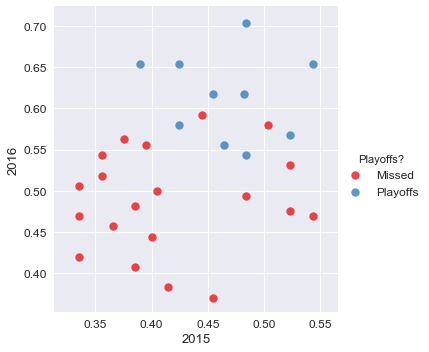

In [15]:
#This looks nice but is useless

# Plot the hyperplane
df = df.apply(pd.to_numeric, errors='ignore')

sns.lmplot('2015', '2016', data=df, hue='Playoffs?', palette='Set1', fit_reg=False, scatter_kws={"s": 70})


In [105]:
#Create a classifier function
def Play_or_Miss(twelve):
    if(classifier.predict([twelve]))==0:
        print(0)
    else:
        print(1)

In [106]:
#a random array with "reasonable" values represent a theoretical season. 
#I'm pretty sure number of wins isn't uniform, but I'll brush over this for now.

randTest = [np.random.uniform(0,0.2), np.random.uniform(0,0.4), np.random.uniform(0,0.6), np.random.uniform(0,0.8), np.random.uniform(0,1)]
randTest1 = np.random.uniform(0,0.2)
randTest2 = np.random.uniform(0,0.4)
randTest3 = np.random.uniform(0,0.6)
randTest4 = np.random.uniform(0,0.8)
randTest5 = np.random.uniform(0,1)

print(randTest)
print(randTest1, randTest2, randTest3, randTest4, randTest5)

Play_or_Miss(randTest)

[0.15247376738686236, 0.05762787772714648, 0.2975886206641239, 0.3053566578780462, 0.3494989125267546]
0.029059911600479937 0.15544148141296987 0.010477886655963874 0.27611056458630046 0.8649282926849411
0
